In [7]:
import gymnasium as gym
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack, VecNormalize
import ale_py
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.callbacks import BaseCallback, CheckpointCallback
import numpy as np
from stable_baselines3.common.evaluation import evaluate_policy
import time
import torch
from torch.utils.tensorboard import SummaryWriter

PATH2 = "./PPO_2_stable_32_1e4_5m/sb3_pong_models_ppo/pong_ppo_final_model.zip"
PATH1 = "./PPO_1_stable_256_25e4_5m/sb3_pong_models_ppo/pong_ppo_final_model.zip"
TB2 = "./PPO_2_stable_32_1e4_5m/eval_1/"
TB1 = "./PPO_1_stable_256_25e4_5m/eval_1/"

In [ ]:
# import gymnasium as gym
# import os
# from stable_baselines3 import PPO
# from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack, VecNormalize
# import ale_py
# from stable_baselines3.common.env_checker import check_env
# from stable_baselines3.common.env_util import make_atari_env
# from stable_baselines3.common.callbacks import BaseCallback, CheckpointCallback
# import numpy as np
# from stable_baselines3.common.evaluation import evaluate_policy
# import time
# import json
# config = {
#     "env_name": "PongNoFrameskip-v4",
#     "num_envs": 1,
#     "seed": 100,
# }
# eval_env = make_atari_env(config["env_name"], n_envs=config["num_envs"], seed=config["seed"], env_kwargs={"render_mode": "human"})
# # eval_env = make_atari_env(config["env_name"], n_envs=config["num_envs"], seed=config["seed"])

# env = VecFrameStack(eval_env, n_stack=4)
# # env = eval_env
# model_path = "./sb3_pong_models_ppo/pong_ppo_final_model.zip"
# model = PPO.load(model_path, env=env)
# print(model.policy)

# vec_env = model.get_env()
# obs = vec_env.reset()
# for i in range(1500):
#     action, _states = model.predict(obs, deterministic=True)
#     obs, rewards, dones, info = vec_env.step(action)
#     vec_env.render("human")

A.L.E: Arcade Learning Environment (version 0.11.2+ecc1138)
[Powered by Stella]


Wrapping the env in a VecTransposeImage.
CustomCnnPolicy(
  (features_extractor): CustomCNN(
    (cnn): Sequential(
      (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=3136, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (pi_features_extractor): CustomCNN(
    (cnn): Sequential(
      (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=3136, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (vf_feature

: 

In [ ]:
# PATH2 = "./PPO_2_stable_32_1e4_5m/sb3_pong_models_ppo/pong_ppo_final_model.zip"
# PATH1 = "./PPO_1_stable_256_25e4_5m/sb3_pong_models_ppo/pong_ppo_final_model.zip"
# TB2 = "./PPO_2_stable_32_1e4_5m/eval/"
# TB1 = "./PPO_1_stable_256_25e4_5m/eval/"
# os.makedirs(TB1, exist_ok=True)
# os.makedirs(TB2, exist_ok=True)

# EPISODES = 200
# config = {
#     "env_name": "PongNoFrameskip-v4",
#     "num_envs": 1,
#     "seed": 100,
# }

# eval_env = make_atari_env(config["env_name"], n_envs=config["num_envs"], seed=config["seed"])
# env = VecFrameStack(eval_env, n_stack=4)

# model = PPO.load(PATH2, env=env)
# vec_env = model.get_env()

# writer = SummaryWriter(log_dir=TB2)

# for episode in range(EPISODES):
#     obs = vec_env.reset()
#     done = False
#     total_reward = 0
#     value_list = []
#     entropy_list = []
#     step_count = 0

#     while not done:

#         obs_tensor = torch.as_tensor(obs).to(model.device)

#         with torch.no_grad():
#             dist = model.policy.get_distribution(obs_tensor)
#             value = model.policy.predict_values(obs_tensor)
#             entropy = dist.entropy().mean().item()

#         value_list.append(value.mean().item())
#         entropy_list.append(entropy)

#         action, _ = model.predict(obs, deterministic=True)
#         obs, rewards, dones, info = vec_env.step(action)

#         total_reward += rewards[0]
#         done = dones[0]
#         step_count += 1

#     mean_value = np.mean(value_list)
#     mean_entropy = np.mean(entropy_list)

#     writer.add_scalar("eval/episode_reward", total_reward, episode)
#     writer.add_scalar("eval/value_mean", mean_value, episode)
#     writer.add_scalar("eval/entropy", mean_entropy, episode)
#     writer.add_scalar("eval/episode_length", step_count, episode)

#     print(f"Episode {episode+1}: Reward={total_reward:.2f}, Value={mean_value:.3f}, Entropy={mean_entropy:.3f}, Steps={step_count}")

# writer.close()

Wrapping the env in a VecTransposeImage.
Episode 1: Reward=21.00, Value=0.738, Entropy=0.706, Steps=2607
Episode 2: Reward=19.00, Value=0.791, Entropy=0.814, Steps=2188
Episode 3: Reward=21.00, Value=0.738, Entropy=0.705, Steps=2606
Episode 4: Reward=21.00, Value=0.745, Entropy=0.701, Steps=2604
Episode 5: Reward=21.00, Value=0.738, Entropy=0.705, Steps=2604
Episode 6: Reward=21.00, Value=0.738, Entropy=0.705, Steps=2607
Episode 7: Reward=19.00, Value=0.792, Entropy=0.814, Steps=2182
Episode 8: Reward=18.00, Value=0.767, Entropy=0.809, Steps=2235
Episode 9: Reward=19.00, Value=0.792, Entropy=0.814, Steps=2184
Episode 10: Reward=19.00, Value=0.792, Entropy=0.814, Steps=2183
Episode 11: Reward=19.00, Value=0.792, Entropy=0.814, Steps=2185
Episode 12: Reward=21.00, Value=0.738, Entropy=0.706, Steps=2608
Episode 13: Reward=18.00, Value=0.767, Entropy=0.808, Steps=2236
Episode 14: Reward=21.00, Value=0.745, Entropy=0.701, Steps=2604
Episode 15: Reward=21.00, Value=0.738, Entropy=0.707, Step

Available metrics: ['eval/episode_reward', 'eval/value_mean', 'eval/entropy', 'eval/episode_length']


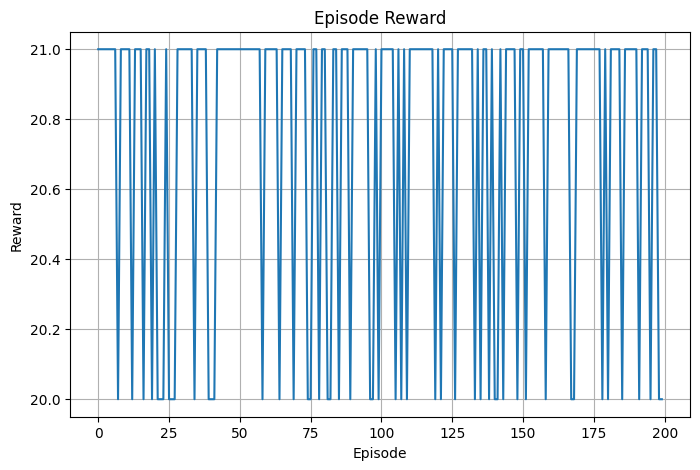

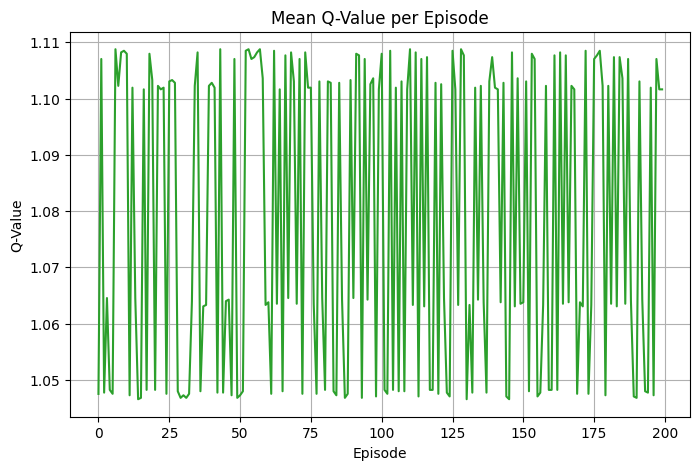

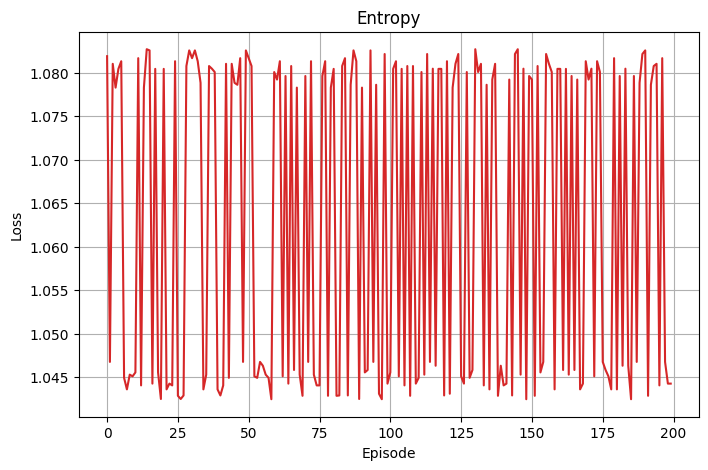

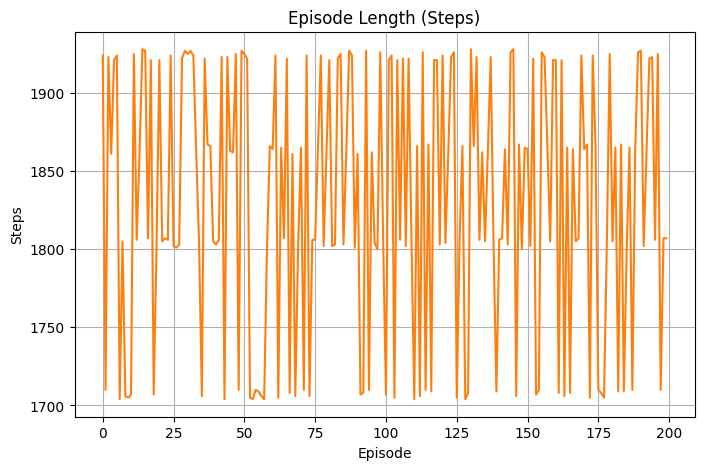

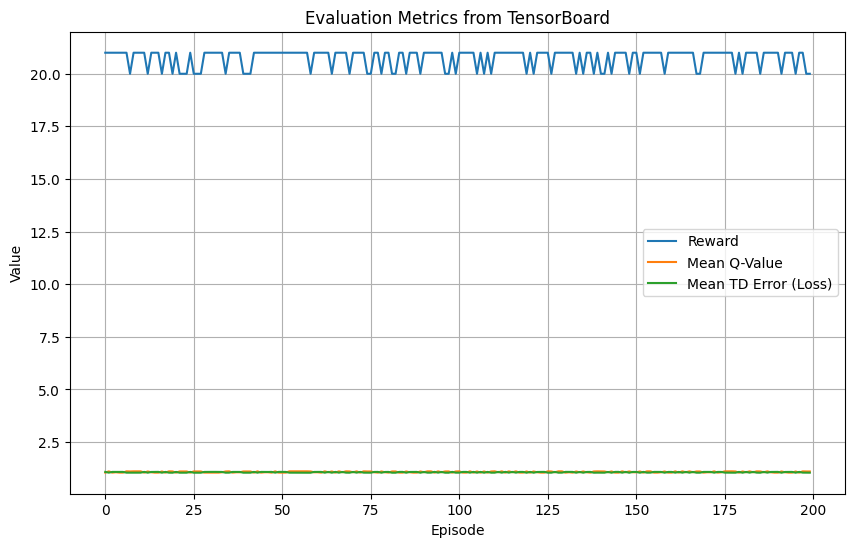

In [8]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

log_dir = TB1

event_file = [f for f in os.listdir(log_dir) if "tfevents" in f][0]
event_path = os.path.join(log_dir, event_file)

ea = event_accumulator.EventAccumulator(event_path)
ea.Reload()  

print("Available metrics:", ea.Tags()["scalars"])

rewards = ea.Scalars("eval/episode_reward") 
value_mean = ea.Scalars("eval/value_mean")    
entropy = ea.Scalars("eval/entropy")
episode_length = ea.Scalars("eval/episode_length")

reward_steps = [x.step for x in rewards]
reward_values = [x.value for x in rewards]

value_mean_steps = [x.step for x in value_mean]
value_mean_data = [x.value for x in value_mean]

entropy_steps = [x.step for x in entropy]
entropy_values = [x.value for x in entropy]

episode_length_steps = [x.step for x in episode_length]
episode_length_values = [x.value for x in episode_length]

plt.figure(figsize=(8, 5))
plt.plot(reward_steps, reward_values, color='tab:blue')
plt.title("Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(value_mean_steps, value_mean_data, color='tab:green')
plt.title("Mean Q-Value per Episode")
plt.xlabel("Episode")
plt.ylabel("Q-Value")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(entropy_steps, entropy_values, color='tab:red')
plt.title("Entropy")
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episode_length_steps, episode_length_values, color='tab:orange')
plt.title("Episode Length (Steps)")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(reward_steps, reward_values, label="Reward")
plt.plot(value_mean_steps, value_mean_data, label="Mean Q-Value")
plt.plot(entropy_steps, entropy_values, label="Mean TD Error (Loss)")
plt.xlabel("Episode")
plt.ylabel("Value")
plt.title("Evaluation Metrics from TensorBoard")
plt.legend()
plt.grid(True)
plt.show()